In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,Gender,Age,Height,Weight,FHWOW,FAVC,NO_OF_MEALS,PRIMARY_MEALS,WATERINTAKE,FAF,WeightClasses
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,2.0,0,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,3.0,3,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,2.0,2,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,2.0,2,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,2.0,0,Overweight


In [3]:
WeightClasses = {
    "Insufficient_Weight" : 1,
    "Normal_Weight" : 2,
    "Overweight" : 3,
    "Obesity" : 4
}
Gender = {
    "Male" : 1,
    "Female" : 2,
    "Others" : 3
}
FHWOW = {
    "yes" : 1,
    "no" : 2
}
FAVC = {
    "yes" : 1,
    "no" : 2
}

df.WeightClasses = [WeightClasses[item] for item in df.WeightClasses]
df.Gender = [Gender[item] for item in df.Gender]
df.FHWOW = [FHWOW[item] for item in df.FHWOW]
df.FAVC = [FAVC[item] for item in df.FAVC]

In [4]:
df.head()

,Gender,Age,Height,Weight,FHWOW,FAVC,NO_OF_MEALS,PRIMARY_MEALS,WATERINTAKE,FAF,WeightClasses
0,2,21.0,1.62,64.0,1,2,2.0,3.0,2.0,0,2
1,2,21.0,1.52,56.0,1,2,3.0,3.0,3.0,3,2
2,1,23.0,1.80,77.0,1,2,2.0,3.0,2.0,2,2
3,1,27.0,1.80,87.0,2,2,3.0,3.0,2.0,2,3
4,1,22.0,1.78,89.8,2,2,2.0,1.0,2.0,0,3


In [5]:
y = df['WeightClasses']
x = df.drop('WeightClasses',axis = 1)
X_train,X_test,y_train,y_test = train_test_split(x,y)

In [6]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
print(knn.score(X_test,y_test))

0.9034090909090909


In [9]:
y_pred = knn.predict(X_test)

<AxesSubplot: >

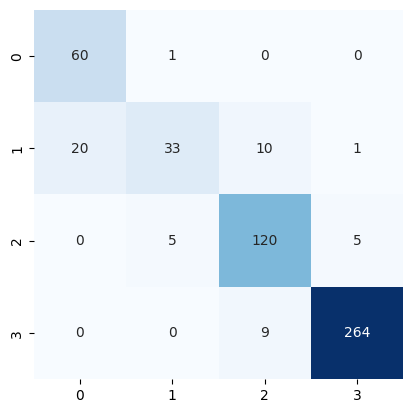

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1, random_state=42)

In [14]:
print(classifier.score(X_test,y_test))

0.8617424242424242


In [15]:
Y_pred = classifier.predict(X_test)

<AxesSubplot: >

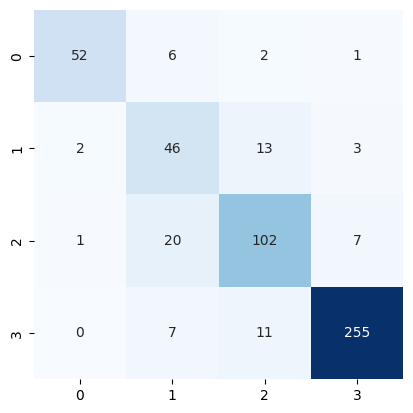

In [16]:
matrix_confusion = confusion_matrix(y_test, Y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [17]:
from sklearn import svm


In [20]:
rbf = svm.SVC(kernel='rbf', gamma=0.7, C=0.1).fit(X_train, y_train)

In [25]:
print(rbf.score(X_test,y_test))

0.5492424242424242


In [27]:
Y_PRED = rbf.predict(X_test)

<AxesSubplot: >

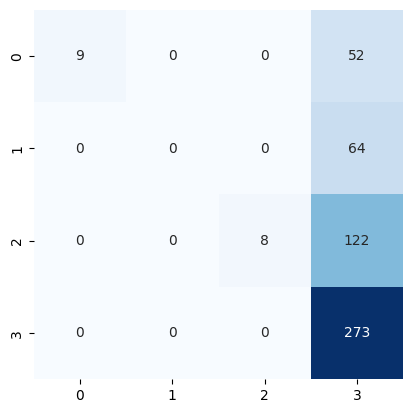

In [28]:
matrix_confusion = confusion_matrix(y_test, Y_PRED)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)